This cell is Markdown

# Heading
## Heading 2
### Heading 3
#### Heading 4
##### Heading 5
###### Heading 6

*italics*

**bold**

- list 1
- list 2

1. list 3
2. list 4

> block

----

Type some `inline code` and the rest of your text

More lines of code
```python
from __future__ import print_function
from fenics import *
from mshr import *
import matplotlib.pyplot as plt
```

Test equations $y=\sqrt{x^{3/2}}$

In [ ]:
from __future__ import print_function
from fenics import *
from dolfin import *
from mshr import *
#%matplotlib widget
import matplotlib.pyplot as plt

Create mesh

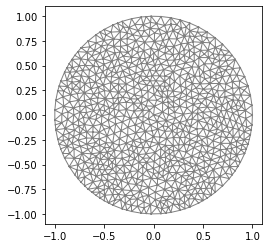

In [2]:
# Create mesh
R1 = 1.
N = 20 # mesh density
domain = Circle(Point(0., 0.), R1)
mesh = generate_mesh(domain, N)
plot(mesh,linewidth=1)


Define function space


In [174]:
#V = FunctionSpace(mesh, 'Lagrange', 1)
V = FunctionSpace(mesh, 'P', 1)

Define boundaries and impose Dirichlet boundary conditions

In [175]:
def boundary(x, on_boundary):
    return on_boundary

#impose Dirichlet boundary conditions
bc = DirichletBC(V, Constant(0.), boundary)

Define the problem

In [149]:
u = Function(V)
v = TestFunction(V)
a = Expression('k', degree=1, k=1.)
#a = Constant(0.)
#a = 1
F = dot(grad(u), grad(v))*dx - a*v*dx

Compute solution

In [150]:
solve(F == 0, u, bc)

Plot solution

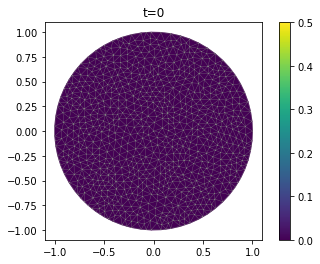

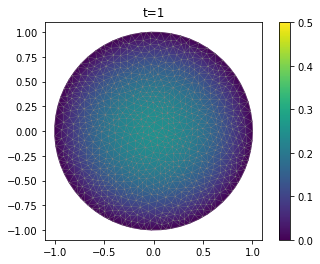

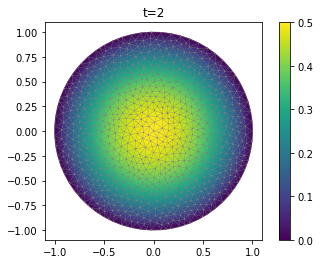

In [151]:
#import time
for t in range(0, 3):
    a.k=t;
    #a.assign(Constant((t)))
    #a=t
    solve(F == 0, u, bc)
#    plt.figure(figsize=(20, 10))
    c = plot(u, mode='color', title='t='+str(t), vmin=0, vmax=0.5)
#    c = plot(u, mode='color', title='t='+str(t))
    plt.colorbar(c)
    plot(mesh,linewidth=0.3)
#    plt.axis('equal')
#    plt.tight_layout()
    plt.show()    

Direct calculation

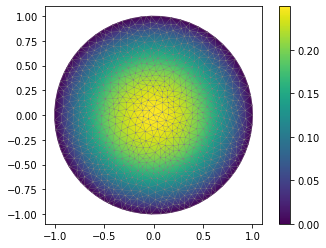

In [182]:
u = Function(V)
v = TestFunction(V)
F = dot(grad(u), grad(v))*dx - v*dx
solve(F == 0, u, bc)
c = plot(u, mode='color')
plt.colorbar(c)
plot(mesh,linewidth=0.3)
plt.show()    

Energy minimization

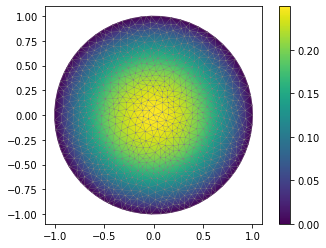

In [176]:
u = Function(V)
v = TestFunction(V)
Energy = (1/2*dot(grad(u),grad(u))-u)*dx
F = derivative(Energy, u, v)
solve(F == 0, u, bc)
c = plot(u, mode='color')
plt.colorbar(c)
plot(mesh,linewidth=0.3)
plt.show()    

Mixed formulation

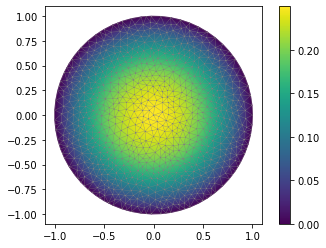

In [203]:
Ps = FiniteElement('P', mesh.ufl_cell(), 1)
#Ps = FiniteElement('DG', mesh.ufl_cell(), 1)
Pu = FiniteElement('P', mesh.ufl_cell(), 1)
W = FunctionSpace(mesh, (Ps*Ps) * Pu)

fw  = Function(W)           # center line
tf = TestFunction(W)
#(tau, v) = TestFunctions(W)
sigma,u=split(fw)
tau,v=split(tf)


def boundary(x, on_boundary):
    return on_boundary
#impose Dirichlet boundary conditions
bc = DirichletBC(W.sub(1), Constant(0.), boundary)

#F1=dot(sigma-grad(u), tau)*dx
F1=(dot(sigma, tau)+u*div(tau))*dx
#F2=(div(sigma)+1)*v*dx
F2=(-dot(sigma,grad(v))+v)*dx
F=F1-F2
solve(F == 0, fw, bc)
c = plot(u, mode='color')
plt.colorbar(c)
plot(mesh,linewidth=0.3)
plt.show()    

Pure Neumann boundary condition

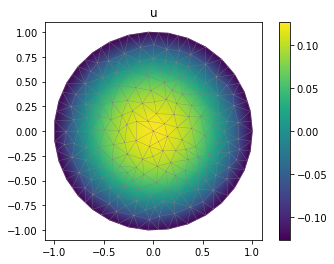

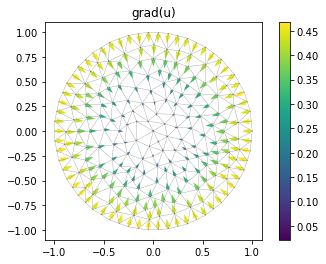

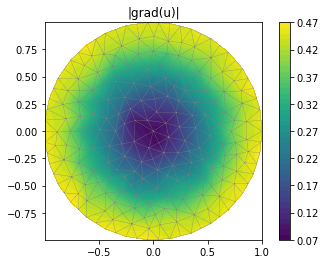

In [94]:
N = 10 # mesh density
domain = Circle(Point(0., 0.), R1)
mesh = generate_mesh(domain, N)
P1 = FiniteElement('P', mesh.ufl_cell(), 1)
R = FiniteElement("Real", mesh.ufl_cell(), 0)
W = FunctionSpace(mesh, P1*R)

func  = Function(W)           # center line
tfunc = TestFunction(W)
u,lam=split(func)
du,dlam=split(tfunc)

g=-1/2
f=1

F=(dot(grad(u), grad(du)) - f*du + u*dlam +lam*du)*dx - g*du*ds
solve(F == 0, func)

cc = plot(u, mode='color', title='u')
plt.colorbar(cc)
plot(mesh,linewidth=0.3)
plt.show()


VS = VectorFunctionSpace(mesh, 'P', 2)
temp = grad(u)
gr = project(temp, VS)
cc=plot(gr,title='grad(u)',width=.008)
plt.colorbar(cc)
plot(mesh,linewidth=0.3)
plt.show()

VS = FunctionSpace(mesh, 'P', 2)
temp = sqrt(dot(grad(u),grad(u)))
gr = project(temp, VS)
cc=plot(gr,title='|grad(u)|')
plt.colorbar(cc)
plot(mesh,linewidth=0.3)
plt.show()

Pure Neumann boundary condition - energy minimization

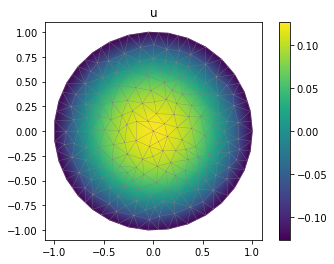

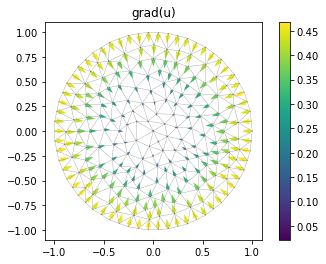

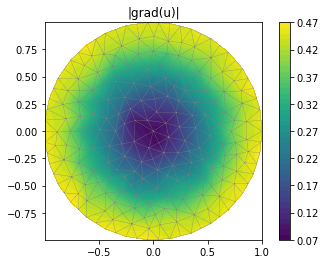

In [101]:
N = 10 # mesh density
domain = Circle(Point(0., 0.), R1)
mesh = generate_mesh(domain, N)
P1 = FiniteElement('P', mesh.ufl_cell(), 1)
R = FiniteElement("Real", mesh.ufl_cell(), 0)
W = FunctionSpace(mesh, P1*R)

func  = Function(W)           # center line
tfunc = TestFunction(W)
u,lam=split(func)

f=1
g=-1/2

Energy = (1/2*dot(grad(u),grad(u))-f*u+lam*u)*dx-g*u*ds
F = derivative(Energy, func, tfunc)
solve(F == 0, func)

cc = plot(u, mode='color', title='u')
plt.colorbar(cc)
plot(mesh,linewidth=0.3)
plt.show()

VS = VectorFunctionSpace(mesh, 'P', 2)
temp = grad(u)
gr = project(temp, VS)
cc=plot(gr,title='grad(u)',width=.008)
plt.colorbar(cc)
plot(mesh,linewidth=0.3)
plt.show()

VS = FunctionSpace(mesh, 'P', 2)
temp = sqrt(dot(grad(u),grad(u)))
gr = project(temp, VS)
cc=plot(gr,title='|grad(u)|')
plt.colorbar(cc)
plot(mesh,linewidth=0.3)
plt.show()

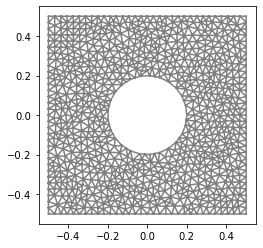

In [141]:
N=20
L=1
R=0.2
domain = Rectangle(Point(-L/2,-L/2),Point(L/2,L/2)) - Circle(Point(0.,0.), R)
mesh=generate_mesh(domain, 25)
plot(mesh)

Elasticity

Calling FFC just-in-time (JIT) compiler, this may take some time.
Energy =  0.014425447732651347


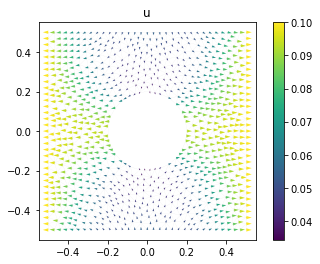

In [2]:
N=30
L=1
R=0.2
domain = Rectangle(Point(-L/2,-L/2),Point(L/2,L/2)) - Circle(Point(0.,0.), R)
mesh=generate_mesh(domain, 25)
#mesh = UnitSquareMesh(N,N,"crossed")
#plot(mesh)

E=1
nu=0.4
mu=E/2/(1+nu)
Lambda=E*nu/(1-nu*nu)
Delta=0.2
d=2


V = VectorFunctionSpace(mesh, 'P', 2)
du  = TestFunction(V)                 # Test function
u  = Function(V) # Displacement 


def left_boundary(x, on_boundary):
    return on_boundary and near(x[0],-L/2);
def right_boundary(x, on_boundary):
    return on_boundary and near(x[0],L/2);

bc_left_X  = DirichletBC(V.sub(0), Constant(-Delta/2), left_boundary)
bc_right_X = DirichletBC(V.sub(0), Constant(+Delta/2), right_boundary)
bc_left_Y  = DirichletBC(V.sub(1), Constant(0.), left_boundary)
bc_right_Y = DirichletBC(V.sub(1), Constant(0.), right_boundary)

bc = [bc_left_X, bc_right_X, bc_left_Y, bc_right_Y]

# Define strain and stress
def epsilon(u):
    return sym(grad(u))
#    return sym(nabla_grad(u))
#return sym(nabla_grad(u))
def sigma(u):
    return Lambda*tr(epsilon(u))*Identity(d) + 2*mu*epsilon(u)

Energy = 1/2*inner(sigma(u),epsilon(u))*dx

F = derivative(Energy, u, du)
solve(F == 0, u, bc)

print("Energy = ",assemble(Energy))

#cc=plot(gr,title='u',width=.008)
cc=plot(u,title='u',width=.008)
plt.colorbar(cc)
plot(mesh,linewidth=0.03)
plt.show() 

u.rename("displacements","")
fileD = File("displacement.pvd");
fileD << u;

VS = FunctionSpace(mesh, 'P', 1)
s = sigma(u) - (1./d)*tr(sigma(u))*Identity(d)  # deviatoric stress
von_Mises_temp = sqrt(3./2*inner(s, s))
von_Mises = project(von_Mises_temp, VS)
von_Mises.rename("von Mises","")
fileS = File("vonMises_stress.pvd");
fileS << von_Mises;


In [22]:
from dolfin import *
from mshr import *
L=1
R=0.4
N=10
domain = Rectangle(Point(-L/2,-L/2),Point(L/2,L/2)) 
domain.set_subdomain(1, Rectangle(Point(-L/2,-L/2),Point(L/2,L/2)))
domain.set_subdomain(2, Circle(Point(0.,0.), R))
# Generate and plot mesh
mesh = generate_mesh(domain, N)
markers = MeshFunction("size_t", mesh, mesh.topology().dim() , mesh.domains())
#plot(mesh)


class Left(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[0], -L/2)

class Right(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[0], +L/2)

class Top(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[1], L/2)

class Bottom(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[1], -L/2)


left = Left()
right = Right()
top = Top()
bottom = Bottom()

# Initialize mesh function for boundary domains
boundaries = MeshFunction("size_t", mesh, mesh.topology().dim()-1, 0)
boundaries.set_all(0)
left.mark(boundaries, 1)
right.mark(boundaries, 2)
top.mark(boundaries, 3)
bottom.mark(boundaries, 4)
    
dx = Measure('dx', domain=mesh, subdomain_data=markers)
ds = Measure('ds', domain=mesh, subdomain_data=boundaries)

print("total area = ", assemble(1*dx))
print("area matrix = ", assemble(1*dx(1)))
print("area inclusion = ", assemble(1*dx(2)))

print("boundary = ", assemble(1*ds(4)))

total area =  1.0000000000000004
area matrix =  0.5055728090000838
area inclusion =  0.4944271909999158
Calling FFC just-in-time (JIT) compiler, this may take some time.
boundary =  1.0


total area =  1.0000000000000058
area matrix =  0.9722091131750552
area inclusion =  0.007771558973901714
boundary =  1.0
Energy =  -0.020811012183109497


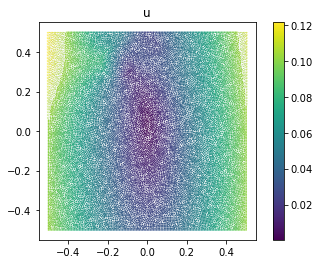

In [48]:
from dolfin import *
from mshr import *
import matplotlib.pyplot as plt

L=1
R1=0.05
R2=0.08
N=100
E1=1
E2=10
E3=0.1
nu1=0.3
nu2=0.2
nu3=0.1
sigma_xx=0.2*E1
tx_left=-sigma_xx
tx_right=+sigma_xx


domain = Rectangle(Point(-L/2,-L/2),Point(L/2,L/2)) 
domain.set_subdomain(1, Rectangle(Point(-L/2,-L/2),Point(L/2,L/2)))
domain.set_subdomain(2, Circle(Point(0.,0.43), R1))
domain.set_subdomain(3, Circle(Point(-0.15,0.35), R2))
# Generate and plot mesh
mesh = generate_mesh(domain, N)
d = mesh.topology().dim()
markers = MeshFunction("size_t", mesh, mesh.topology().dim() , mesh.domains())
#plot(mesh)


class Left(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[0], -L/2)

class Right(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[0], +L/2)

class Top(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[1], L/2)

class Bottom(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[1], -L/2)


left = Left()
right = Right()
top = Top()
bottom = Bottom()

# Initialize mesh function for boundary domains
boundaries = MeshFunction("size_t", mesh, mesh.topology().dim()-1, 0)
boundaries.set_all(0)
left.mark(boundaries, 1)
right.mark(boundaries, 2)
top.mark(boundaries, 3)
bottom.mark(boundaries, 4)
    
dx = Measure('dx', domain=mesh, subdomain_data=markers)
ds = Measure('ds', domain=mesh, subdomain_data=boundaries)

print("total area = ", assemble(1*dx))
print("area matrix = ", assemble(1*dx(1)))
print("area inclusion = ", assemble(1*dx(2)))

print("boundary = ", assemble(1*ds(1)))

#RS = FunctionSpace(mesh, 'R', 0)
#u0  = Function(RS)
#u0.interpolate(area)
#print(u0)



class E_class(UserExpression):
    def __init__(self, **kwargs):
        self.markers = markers
        super().__init__(**kwargs)
    def eval_cell(self, value, x, ufc_cell):
        if markers[ufc_cell.index] == 1:
            value[0] = E1
        elif markers[ufc_cell.index] == 2:
            value[0] = E2
        else:
            value[0] = E3

class nu_class(UserExpression):
    def __init__(self, **kwargs):
        self.markers = markers
        super().__init__(**kwargs)
    def eval_cell(self, value, x, ufc_cell):
        if markers[ufc_cell.index] == 1:
            value[0] = nu1
        elif markers[ufc_cell.index] == 2:
            value[0] = nu2
        else:
            value[0] = nu3

            
E = E_class(degree=1)
nu = nu_class(degree=1)
mu=E/2/(1+nu)
Lambda=E*nu/(1-nu*nu)

# Define strain and stress
def epsilon(u):
    return sym(grad(u))
#    return sym(nabla_grad(u))
#return sym(nabla_grad(u))
def sigma(u):
    return Lambda*tr(epsilon(u))*Identity(d) + 2*mu*epsilon(u)



P1 = FiniteElement('P', mesh.ufl_cell(), 1)
R = FiniteElement("Real", mesh.ufl_cell(), 0)
W = FunctionSpace(mesh, (P1*P1)*((R*R)*R))

func  = Function(W)           # center line
tfunc = TestFunction(W)
u, c=split(func)
c_trans, c_rot = split(c)

r=Expression(('x[0]','x[1]'),degree=1)

Energy = 1/2*inner(sigma(u),epsilon(u))*dx + dot(c_trans,u)*dx \
        -tx_left*u[0]*ds(1)-tx_right*u[0]*ds(2) \
        +c_rot*(r[0]*u[1]-r[1]*u[0])*dx

F = derivative(Energy, func, tfunc)
solve(F == 0, func)

print("Energy = ",assemble(Energy))

cc=plot(u,title='u',width=.008)
plt.colorbar(cc)
plot(mesh,linewidth=0.03)
plt.show() 

VS = VectorFunctionSpace(mesh, 'P', 1)
disp=project(u, VS)
disp.rename("displacements","")
fileD = File("displacement.pvd");
fileD << disp;

FS = FunctionSpace(mesh, 'P', 1)
s = sigma(u) - (1./d)*tr(sigma(u))*Identity(d)  # deviatoric stress
von_Mises_temp = sqrt(3./2*inner(s, s))
von_Mises = project(von_Mises_temp, FS)
von_Mises.rename("von Mises","")
fileS = File("vonMises_stress.pvd");
fileS << von_Mises;

sigma_xx = project(sigma(u)[0,0], FS)
sigma_xx.rename("sigma_xx","")
fileS = File("sigma_xx.pvd");
fileS << sigma_xx;

sigma_yy = project(sigma(u)[1,1], FS)
sigma_yy.rename("sigma_yy","")
fileS = File("sigma_yy.pvd");
fileS << sigma_yy;

sigma_xy = project(sigma(u)[0,1], FS)
sigma_xy.rename("sigma_xy","")
fileS = File("sigma_xy.pvd");
fileS << sigma_xy;

young = project(E, FS)
young.rename("Young's modulus","")
fileS = File("young.pvd");
fileS << young;

Cahn Hilliard

In [51]:
import random
from dolfin import *


# Class representing the intial conditions
class InitialConditions(UserExpression):
    def __init__(self, **kwargs):
        random.seed(2 + MPI.rank(MPI.comm_world))
        super().__init__(**kwargs)
    def eval(self, values, x):
        values[0] = 0.63 + 0.02*(0.5 - random.random())
        values[1] = 0.0
    def value_shape(self):
        return (2,)
    
# Class for interfacing with the Newton solver
class CahnHilliardEquation(NonlinearProblem):
    def __init__(self, a, L):
        NonlinearProblem.__init__(self)
        self.L = L
        self.a = a
    def F(self, b, x):
        assemble(self.L, tensor=b)
    def J(self, A, x):
        assemble(self.a, tensor=A)
        

lmbda  = 1.0e-02  # surface parameter
dt     = 5.0e-06  # time step
theta  = 0.5      # time stepping family, e.g. theta=1 -> backward Euler, theta=0.5 -> Crank-Nicolson

# Form compiler options
parameters["form_compiler"]["optimize"]     = True
parameters["form_compiler"]["cpp_optimize"] = True

# Create mesh and build function space
mesh = UnitSquareMesh.create(96, 96, CellType.Type.quadrilateral)
P1 = FiniteElement("Lagrange", mesh.ufl_cell(), 1)
ME = FunctionSpace(mesh, P1*P1)

# Define trial and test functions
du    = TrialFunction(ME)
q, v  = TestFunctions(ME)

# Define functions
u   = Function(ME)  # current solution
u0  = Function(ME)  # solution from previous converged step

# Split mixed functions
dc, dmu = split(du)
c,  mu  = split(u)
c0, mu0 = split(u0)

# Create intial conditions and interpolate
u_init = InitialConditions(degree=1)
u.interpolate(u_init)
u0.interpolate(u_init)

# Compute the chemical potential df/dc
c = variable(c)
f    = 100*c**2*(1-c)**2
dfdc = diff(f, c)

# mu_(n+theta)
mu_mid = (1.0-theta)*mu0 + theta*mu

# Weak statement of the equations
L0 = c*q*dx - c0*q*dx + dt*dot(grad(mu_mid), grad(q))*dx
L1 = mu*v*dx - dfdc*v*dx - lmbda*dot(grad(c), grad(v))*dx
L = L0 + L1

# Compute directional derivative about u in the direction of du (Jacobian)
a = derivative(L, u, du)

# Create nonlinear problem and Newton solver
problem = CahnHilliardEquation(a, L)
solver = NewtonSolver()
solver.parameters["linear_solver"] = "lu"
solver.parameters["convergence_criterion"] = "incremental"
solver.parameters["relative_tolerance"] = 1e-6

# Output file
file = File("output.pvd", "compressed")

# Step in time
t = 0.0
T = 50*dt
while (t < T):
    t += dt
    print(t)
    u0.vector()[:] = u.vector()
    solver.solve(problem, u.vector())
    file << (u.split()[0], t)

5e-06
1e-05
1.5000000000000002e-05
2e-05
2.5e-05
3e-05
3.5000000000000004e-05
4e-05
4.5e-05
5e-05
5.5e-05
6e-05
6.500000000000001e-05
7.000000000000001e-05
7.500000000000001e-05
8e-05
8.5e-05
9e-05
9.5e-05
0.0001
0.000105
0.00011
0.000115
0.00012
0.000125
0.00013000000000000002
0.00013500000000000003
0.00014000000000000004
0.00014500000000000006
0.00015000000000000007
0.00015500000000000008
0.0001600000000000001
0.0001650000000000001
0.00017000000000000012
0.00017500000000000013
0.00018000000000000015
0.00018500000000000016
0.00019000000000000017
0.00019500000000000019
0.0002000000000000002
0.0002050000000000002
0.00021000000000000023
0.00021500000000000024
0.00022000000000000025
0.00022500000000000026
0.00023000000000000028
0.0002350000000000003
0.0002400000000000003
0.0002450000000000003
0.00025000000000000033


In [13]:
import random
from dolfin import *


# Class representing the intial conditions
class InitialConditions(UserExpression):
    def __init__(self, **kwargs):
        random.seed(2 + MPI.rank(MPI.comm_world))
        super().__init__(**kwargs)
    def eval(self, values, x):
        values[0] = 0.63 + 0.02*(0.5 - random.random())
        values[1] = 0.0
    def value_shape(self):
        return (2,)
            

lmbda  = 1.0e-02  # surface parameter
dt     = 5.0e-06  # time step
theta  = 0.5      # time stepping family, e.g. theta=1 -> backward Euler, theta=0.5 -> Crank-Nicolson

# Form compiler options
parameters["form_compiler"]["optimize"]     = True
parameters["form_compiler"]["cpp_optimize"] = True

# Create mesh and build function space
mesh = UnitSquareMesh.create(96, 96, CellType.Type.quadrilateral)
P1 = FiniteElement("Lagrange", mesh.ufl_cell(), 1)
ME = FunctionSpace(mesh, P1*P1)

# Define trial and test functions
q, v  = TestFunctions(ME)

# Define functions
u   = Function(ME)  # current solution
u0  = Function(ME)  # solution from previous converged step

# Split mixed functions
c,  mu  = split(u)
c0, mu0 = split(u0)


# Create intial conditions and interpolate
u_init = InitialConditions(degree=1)
u.interpolate(u_init)
u0.interpolate(u_init)

# Compute the chemical potential df/dc
c = variable(c)
f    = 100*c**2*(1-c)**2
dfdc = diff(f, c)
#G = f*dx + 1/2*dot(grad(c),grad(c))*dx
#FS=FunctionSpace(mesh, P1)
#tf=TestFunctions(FS)
#dr=derivative(G, c, v)

# mu_(n+theta)
mu_mid = (1.0-theta)*mu0 + theta*mu

# Weak statement of the equations
L0 = c*q*dx - c0*q*dx + dt*dot(grad(mu_mid), grad(q))*dx
L1 = mu*v*dx - dfdc*v*dx - lmbda*dot(grad(c), grad(v))*dx
#L1 = mu*v*dx - dr
L = L0 + L1


# Output file
fileC = File("output2_c.pvd", "compressed")
fileM = File("output2_m.pvd", "compressed")

#FS=FunctionSpace(mesh, 'P', 1)

# Step in time
t = 0.0
T = 50*dt
while (t < T):
    t += dt
    print(t)
    u0.vector()[:] = u.vector()
    solve(L == 0, u)
    fileC << (u.split()[0], t)
    fileM << (u.split()[1], t)

5e-06
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
1e-05
1.5000000000000002e-05
2e-05
2.5e-05
3e-05
3.5000000000000004e-05
4e-05
4.5e-05
5e-05
5.5e-05
6e-05
6.500000000000001e-05
7.000000000000001e-05
7.500000000000001e-05
8e-05
8.5e-05
9e-05
9.5e-05
0.0001
0.000105
0.00011
0.000115
0.00012
0.000125
0.00013000000000000002
0.00013500000000000003
0.00014000000000000004
0.00014500000000000006
0.00015000000000000007
0.00015500000000000008
0.0001600000000000001
0.0001650000000000001
0.00017000000000000012
0.00017500000000000013
0.00018000000000000015
0.00018500000000000016
0.00019000000000000017
0.00019500000000000019
0.0002000000000000002
0.0002050000000000002
0.00021000000000000023
0.00021500000000000024
0.00022000000000000025
0.00022500000000000026
0.00023000000000000028
0.0002350000000000003
0.0002400000000000003
0.0002450000000000003
0.00025000000000000033


magnetostatics

[20  0 21 ...  0  0  0]


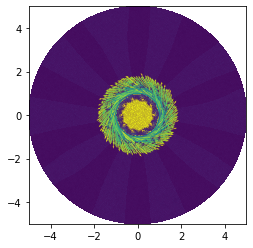

In [205]:
from __future__ import print_function
from fenics import *
from mshr import *
from math import sin, cos, pi
import matplotlib.pyplot as plt

a = 1.0   # inner radius of iron cylinder
b = 1.2   # outer radius of iron cylinder
c_1 = 0.8 # radius for inner circle of copper wires
c_2 = 1.4 # radius for outer circle of copper wires
r = 0.1   # radius of copper wires
R = 5.0   # radius of domain
n = 10    # number of windings

# Define geometry for background
domain = Circle(Point(0, 0), R)

# Define geometry for iron cylinder
cylinder = Circle(Point(0, 0), b) - Circle(Point(0, 0), a)

# Define geometry for wires (N = North (up), S = South (down))
angles_N = [i*2*pi/n for i in range(n)]
angles_S = [(i + 0.5)*2*pi/n for i in range(n)]
wires_N = [Circle(Point(c_1*cos(v), c_1*sin(v)), r) for v in angles_N]
wires_S = [Circle(Point(c_2*cos(v), c_2*sin(v)), r) for v in angles_S]

# Set subdomain for iron cylinder
domain.set_subdomain(1, cylinder)

# Set subdomains for wires
for (i, wire) in enumerate(wires_N):
    domain.set_subdomain(2 + i, wire)
for (i, wire) in enumerate(wires_S):
    domain.set_subdomain(2 + n + i, wire)

# Create mesh
mesh = generate_mesh(domain, 128)

# Define function space
V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition
bc = DirichletBC(V, Constant(0), 'on_boundary')

# Define subdomain markers and integration measure
markers = MeshFunction('size_t', mesh, 2, mesh.domains())
print(markers.array())

dx = Measure('dx', domain=mesh, subdomain_data=markers)

# Define current densities
J_N = Constant(1.0)
J_S = Constant(-1.0)

# Define magnetic permeability
class Permeability(UserExpression):
    def __init__(self, markers, **kwargs):
        super().__init__(**kwargs)
        self.markers = markers
    def eval_cell(self, values, x, cell):
        if self.markers[cell.index] == 0:
            values[0] = 4*pi*1e-7 # vacuum
        elif self.markers[cell.index] == 1:
            values[0] = 1e-5      # iron (should really be 6.3e-3)
        else:
            values[0] = 1.26e-6   # copper

mu = Permeability(markers, degree=1)

# Define variational problem
A_z = TrialFunction(V)
v = TestFunction(V)
a = (1 / mu)*dot(grad(A_z), grad(v))*dx
L_N = sum(J_N*v*dx(i) for i in range(2, 2 + n))
L_S = sum(J_S*v*dx(i) for i in range(2 + n, 2 + 2*n))
L = L_N + L_S

# Solve variational problem
A_z = Function(V)
solve(a == L, A_z, bc)

# Compute magnetic field (B = curl A)
W = VectorFunctionSpace(mesh, 'P', 1)
B = project(as_vector((A_z.dx(1), -A_z.dx(0))), W)

# Plot solution
plot(A_z)
plot(B)
plt.show()